<a href="https://colab.research.google.com/github/solobala/TSML13/blob/main/%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Марковская цепь

Материалы и датасеты для занятия можно найти в [репозитории](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4) GitHub или на [гугл-диске](https://drive.google.com/drive/folders/1Y1kXHasr5_hompZatPmdGaRkDYoxxqQ3?usp=sharing)

Пусть $E$ - некоторое дискретное (конечное или счётное) множество, которое называют пространством состояний.

**Примеры:**
- $E1=\{солнечно,пасмурно,дождь,снег\}$ - пространство погодных условий
- $E2=\{а,б,…,я\}$ - пространство кириллических букв
- $E3=ℕ=\{0,1,…,\}$ - пространство целых чисел (число студентов в классе)

Если система находится в состоянии $i \in E$ в момент времени $n$, то в момент времени $n+1$ она может перейти в состояние $j \in E$ с переходной вероятностью $p_{ij}$.

Например для кириллицы $p_{п,р}=0.278$  $p_{п,ы}=0.009$

# Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$
$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
# Читаем из файла все что написано латиницей и переводим в нижний регистр
with open('alice_en.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^a-z]','', text)

In [3]:
# Вспомогательный словарь. ключи - буквы, значения - номер буквы в стрке алфавита
ENGLISH = 'abcdefghijklmnopqrstuvwxyz'
POS = {l: i for i, l in enumerate(ENGLISH)}

In [6]:
POS.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [7]:
# Создаем квадратную матрицу вероятностей размером к-во букв в алфавите х к-во букв в алфавите и заполняем нулями
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))

In [9]:
# Берем текст на английском как списоки в 2 направлениях - прямом и обратном
# для каждого элемента смотрим какая буква стоит н аследующей позиции
# например, если после a стоит b, то в вероятности a->b добавляем 1
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [10]:
# теперь для каждого сочетания считаем относилную вероятность (типа сколько раз встречается b после a)
# путем деления к-ва раз на общее число сочетаний
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [11]:
# преобразуем матрицу в датафрейм
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

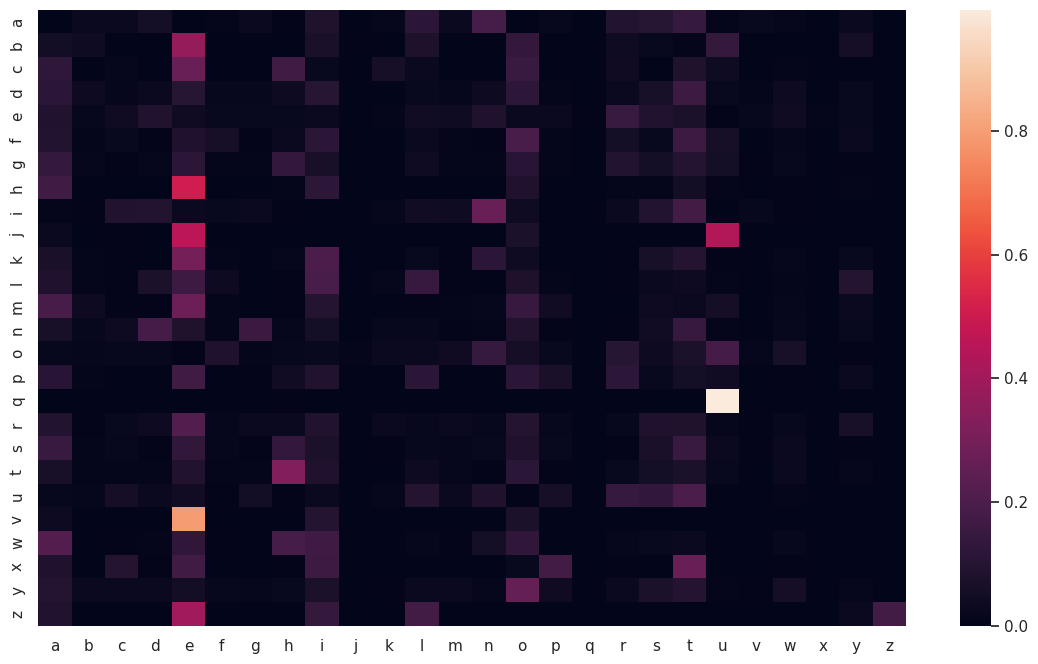

In [12]:
# Строим матрицу кореляций
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

### Практика - постройте матрицу вероятности для русской версии книги

In [20]:
# Читаем из файла все что написано кириллицей и переводим в нижний регистр
# Пришлось сначала поменять кодировку и сохранить как html, а потом опять поменять и сохранить как txt
with open('alice_ru_2.txt', 'r', encoding="utf-8") as f1:
    text1 = f1.read().lower()
text1 = re.sub('[^а-я]','', text1)

In [21]:
# Вспомогательный словарь. ключи - буквы, значения - номер буквы в стрке алфавита
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS_R = {l: i for i, l in enumerate(RUSSIAN)}

In [22]:
# Создаем квадратную матрицу вероятностей размером к-во букв в алфавите х к-во букв в алфавите и заполняем нулями
probabilities_r = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [23]:
# Берем текст на русском как списоки в 2 направлениях - прямом и обратном
# для каждого элемента смотрим какая буква стоит н аследующей позиции
# например, если после a стоит b, то в вероятности а->б добавляем 1
for cp, cn in zip(text1[:-1], text1[1:]):
    probabilities_r[POS_R[cp], POS_R[cn]] += 1

In [24]:
# теперь для каждого сочетания считаем относилную вероятность (типа сколько раз встречается b после a)
# путем деления к-ва раз на общее число сочетаний
probabilities_r = (probabilities_r / probabilities_r.sum(axis=1)[:, None])

<ipython-input-24-d33f540ee718>:3: RuntimeWarning: invalid value encountered in divide
  probabilities_r = (probabilities_r / probabilities_r.sum(axis=1)[:, None])


In [25]:
# преобразуем матрицу в датафрейм
dfr = pd.DataFrame(probabilities_r, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

In [26]:
dfr.head()

,а,б,в,г,д,е,ё,ж,з,и,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.026898,0.013449,0.054194,0.016936,0.037956,0.024108,0.0,0.014644,0.071329,0.017533,...,0.000697,0.025902,0.010161,0.003586,0.00000,0.000000,0.000000,0.004881,0.010460,0.027894
б,0.049148,0.001311,0.003277,0.000000,0.002621,0.165138,0.0,0.000655,0.000000,0.076671,...,0.000000,0.000000,0.000000,0.005898,0.01114,0.246396,0.003277,0.005242,0.000000,0.045216
в,0.187118,0.001273,0.007892,0.008147,0.019603,0.127037,0.0,0.001782,0.020621,0.082485,...,0.001273,0.005855,0.011456,0.000000,0.00000,0.061354,0.003819,0.005601,0.000000,0.005346
г,0.059819,0.003386,0.006208,0.001129,0.077314,0.031603,0.0,0.000000,0.002822,0.047968,...,0.000564,0.004515,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000564
д,0.183419,0.004769,0.034483,0.001467,0.005136,0.183419,0.0,0.000000,0.002568,0.076669,...,0.009905,0.001101,0.000000,0.000000,0.00000,0.022744,0.019442,0.000734,0.002201,0.012106


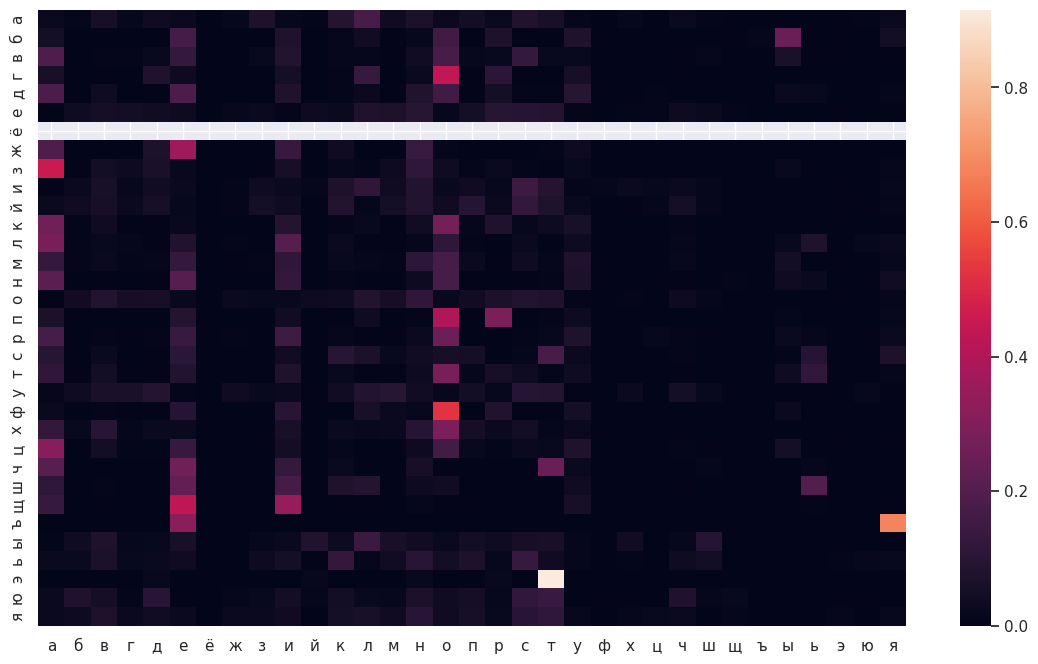

In [27]:
# Строим матрицу кореляций
plt.figure(figsize=(14,8))
sns.heatmap(dfr)
plt.show()

# Траектория в цепи

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос даст одна простая теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

Вероятность hello = произведению вероятностей  1/26  и h->e, e->l, l->l, l->0

In [28]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

5.348363016330027e-07


**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. Оказывается, что это не так уж и далеко от истины.

**Теорема.** Пусть $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. Тогда $P^{(n)}=P⋅P⋅…⋅P=P^n$

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"?

In [ ]:
start = POS['h']
end = POS['y']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['h', c, 'y']), proba)

hay 0.00019786241179454468
hby 3.2498131357446945e-06
hcy 2.5963886570530186e-07
hdy 2.00246712505073e-06
hey 0.00041670464060019366
hfy 2.4496387427496224e-06
hgy 2.2022341052346015e-07
hhy 3.0694052582470812e-06
hky 1.0202901705244971e-07
hly 6.987940162352581e-06
hmy 4.054691865351508e-06
hny 1.0187698076726042e-06
hoy 2.0758961455728112e-05
hpy 2.095534994542692e-06
hry 2.9097918521227684e-05
hsy 2.6301624264116166e-06
hty 2.5534949950507335e-05
huy 2.316043298098595e-07
hvy 3.0372085380791536e-08
hwy 6.902550257831721e-07
hyy 4.816238159185105e-06


Это работает не всегда. Почему же? Потому что никто не обещал, что переходная вероятность не зависит от шага. Если она действительно не зависит, то говорят, что марковская цепь однородна.

# Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

In [29]:
POS['d']

3

In [31]:
s = []
start = np.random.choice(list(ENGLISH)) # выбираем случайный символ
s.append(start) # Добавляем его в список
length = 10 # будем генерировать последовательность длины n
for i in range(length):
    index = POS[s[i]]# Это значение i-го символа выборки в словаре POS ( фактически, это позиция символа в словаре из английскимх букв)
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index]) # выбираем следующий случайный символ, но уже с вероятностью его нахождения после предыдущего
    s.append(next_char) # добавляем его в список

print (''.join(s)) # На печать выведется 11 сивмолов - самый первый и еще 10 - это же неверно, нас просили всего 10 символов

nitintthads


### Практика: сгенерируйте все возможные комбинации строк из марковской цепи (длины 4) и отобразите их вероятность

In [ ]:
prior = 1. / len(ENGLISH)
for i in ENGLISH:
  start = POS[i]
  for j in ENGLISH:
    second = POS[j]
    for k in ENGLISH:
      third = POS[k]
      for l in ENGLISH:
        end = POS[l]
        proba = prior * probabilities[start, second] * probabilities[second, third] * probabilities[third, end]
        if proba > 0:
            print(''.join([i, j, k, l]), proba)

# Модели временных рядов с переключениями

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1. Простейшая модель переключения для переменной $z_t$ состоит из двух спецификаций типа AR:

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$

где $|\beta|<1$ и $\epsilon_t i.i.d.$ с нулевым средним и дисперсией $\sigma^2_\epsilon$.

???
? Почему для состояния St=1 сохраняется к-т alfa0??

?? Что значит   ϵti.i.d.??

In [39]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100) # Это список состояний из 0 и 1, сгенерированны йслучайным образом
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

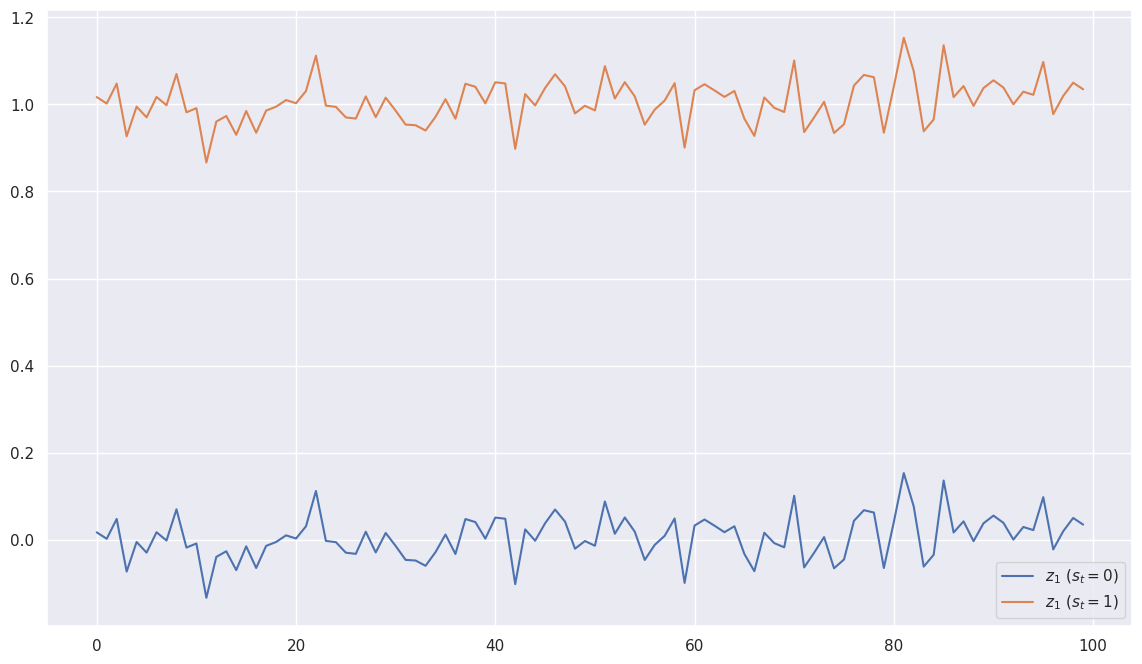

In [40]:
plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()

In [41]:
z = []
# Ранее у нас были сгенерированы 2 серии, в одной - значения с сототянием 0, в другой - значения с сотоянием 1
# Сделаем из них серию, где значения будут чередоваться в соответствии с состояниями из списке s
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

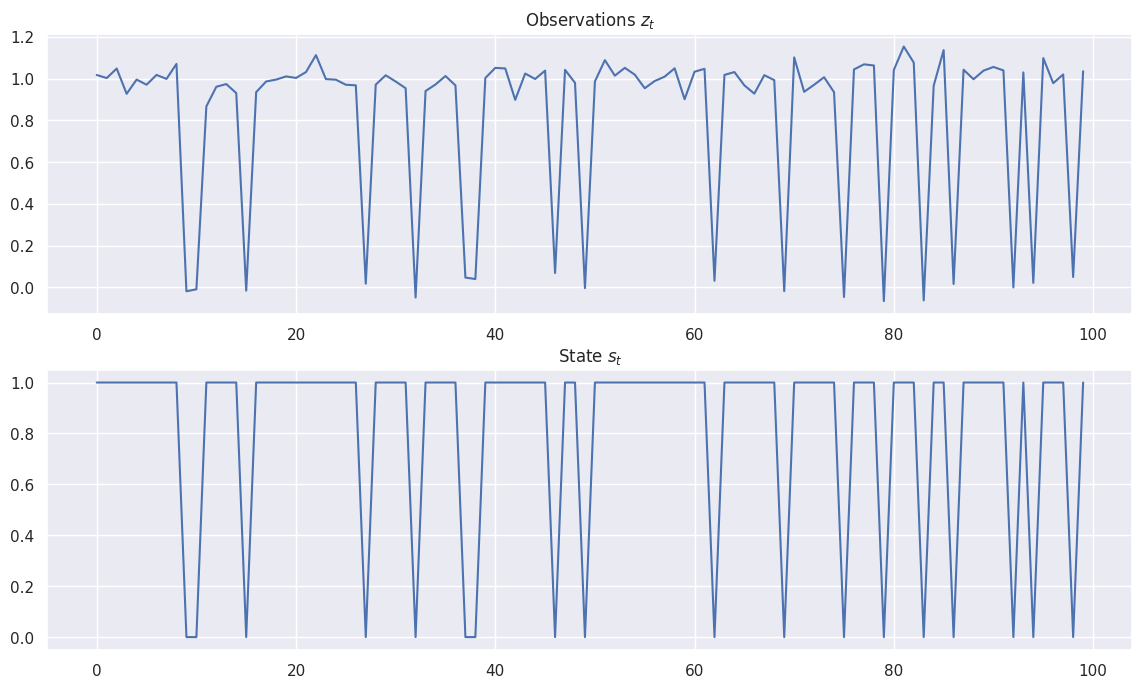

In [42]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

Это стационарный AR(1) процесс со средним $\dfrac{\alpha_0}{1-\beta}$ при $s_t=0$ и переключающийся на другой стационарный AR(1) процесс со средним $\dfrac{\alpha_0+\alpha_1}{1-\beta}$, когда $s_t$ переключается с 0 на 1.

- если $a_1 \ne 0$: два динамических паттерна в зависимости от значения переменной состояния $s_t$;
- в этом случае $z_t$ управляется двумя распределениями с разным средним;
- переменная $s_t$ отвечает за переключение между этими распределениями (режимами).

Только что показанный пример: $s_t \sim Bern(p),p=0.8$.

В этой модели $s_t$ не зависит от предыдущих и будущих реализаций, поэтому $z_t$ может сильно "прыгать" (часто переключаться между разными состояниями).

### Практика. Сгенерируйте модель с переключениями на основе двух моделей AR(1)

In [ ]:
?? А чем это отличается от рассмотренного случая? Тут же тоже были 2 модели AR(1)??

## Что такое модель с марковским переключением?

Пусть, как раньше,

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1 согласно марковской цепи первого порядка:

$P=\begin{pmatrix} P(s_t=0|s_{t-1}=0) & P(s_t=1|s_{t-1}=0 \\ P(s_t=0|s_{t-1}=1) & P(s_t=1|s_{t-1}=1 \end{pmatrix} = \begin{pmatrix} p_{00} & p_{01} \\ p_{10} & p_{11} \end{pmatrix}$

где за $p_{ij},i,j∈\{0,1\}$ обозначена вероятность перехода в состояние $s_t=j$ из состояния $s_{i−1}=i$.

- Матрица перехода управляет случайным поведением переменной состояния и зависит только от двух параметров ($p00$
 и $p11$).
- Модель такого типа называют моделью с марковскими переключениями.
- Свойства $z_t$ определяются характеристиками распределения как $\epsilon_t$, так и переменной состояния $s_t$.
- В частности, марковская переменная состояния приводит к случайным и частым сменам режима, а вероятности перехода определяют персистентность каждого из режимов.

Важный факт: распределение наблюдений обусловлено ненаблюдаемой переменной состояния:
$Law(z_t)=Law(z_t|s_t)$

Например:
- $Law(z_t|s_t=0) = N(\dfrac{\alpha_0}{1-\beta}, \sigma_\epsilon^2)$
- $Law(z_t|s_t=1) = N(\dfrac{\alpha_0 + \alpha_1}{1-\beta}, \sigma_\epsilon^2)$

# Как сгенерировать траекторию модели с марковскими переключениями?

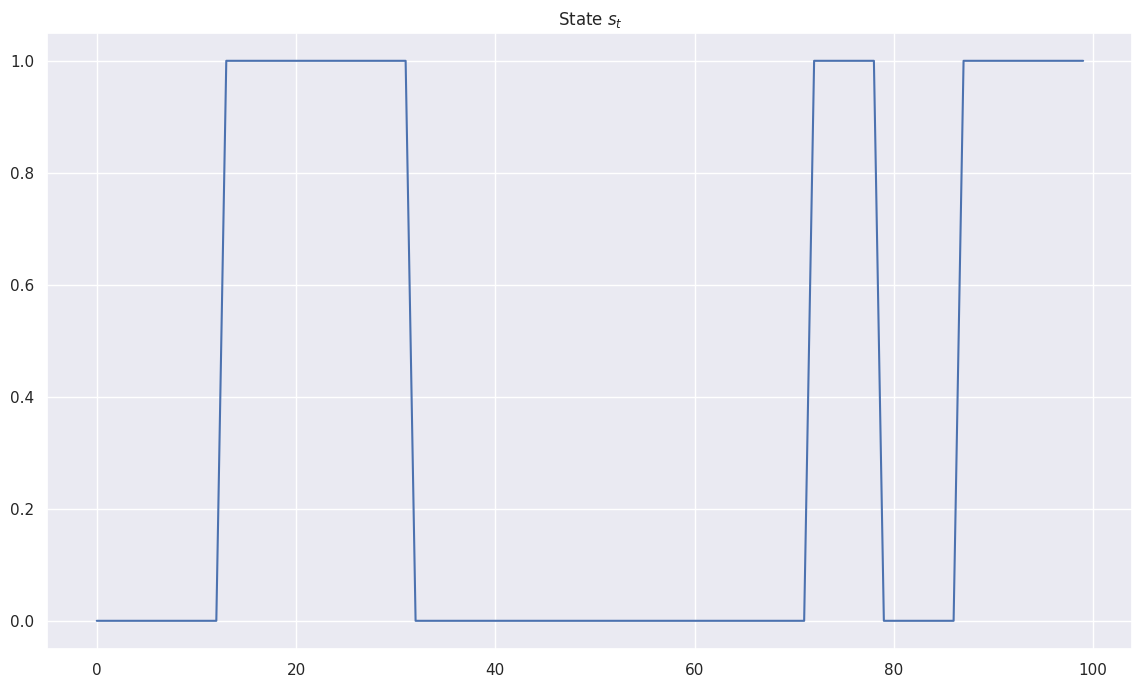

In [43]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
# P - матрица перехода между состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
# Пока в списке состояний только один элемент, пусть это будет 0 состояние
s = [0]
# В серии будет 100 наблюдений, первое уже задано сотсоянием 0
for t in range(99):
    distribution = P[s[-1]] # берем последнее из наблюдений, проверяем, к какому состоянию оно относится 0 или 1, и берем соотв. строку из матрицы перехода
    # добавляем в список состояний новый элемент, зависящий от предыдущего состояния через вероятность p=distribution, которую мы посчитали на предыдущем шаге
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$') # Фактически мы сгенерировали временной ряд из состояний ( о или 1)
plt.show()

In [44]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

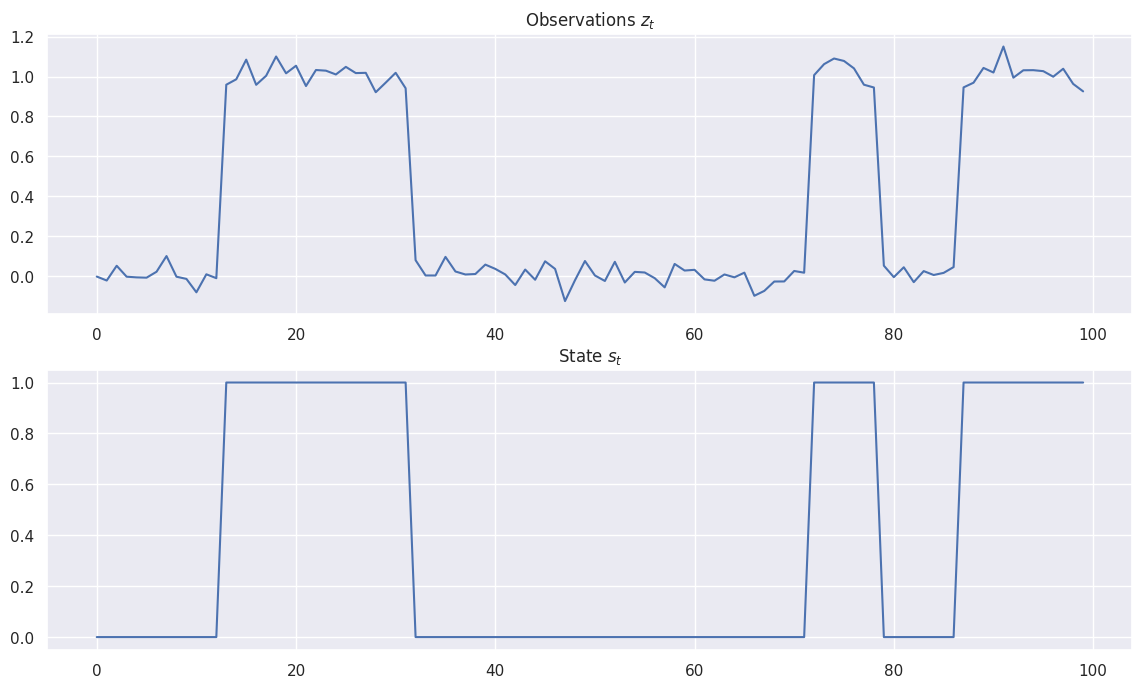

In [45]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

# Что такое скрытые марковские модели?

**Определение.** Скрытая марковская модель (первого порядка) - это вероятностная модель последовательности, которая состоит из набора наблюдаемых переменных $X={x_1,…,x_n}$, где $x_k \in R^d$, и набора латентных (или скрытых)
переменных

$T={t_1,...,t_n}, t_k \in \{0,1\}^K, \sum \limits_{i=1}^K t_{ki} = 1$.

- латентные переменные являются бинарными и кодируют $K$ состояний: переменные состояния;
- значения наблюдаемого вектора $x_k$ в момент времени $k$ зависят только от скрытого состояния $t_k$;
- $t_k$, в свою очередь, зависит только от $t_{k−1}$.

Пусть в скрытой марковской модели $K$ состояний. Закодируем их состояния в момент времени $n$ бинарным вектором $t_n=(t_{n1},…,t_{nK})$ по правилу:

$t_{ij} = \begin{cases} 1, & \mbox{ система находится в состоянии j в момент времени i} \\ 0, & \mbox{иначе} \end{cases}$

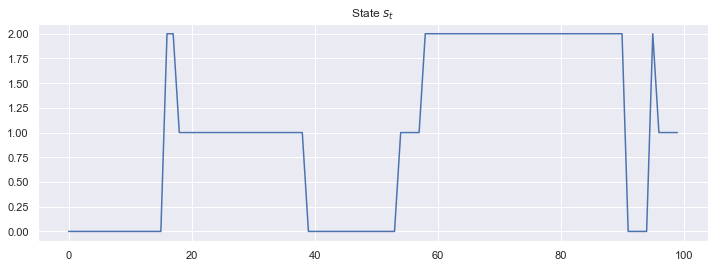

In [ ]:
P = np.array([
    [0.95, 0.025, 0.025],
    [0.025, 0.95, 0.025],
    [0.025, 0.025, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(s)
_ = axs.set_title('State $s_t$')
plt.show()

In [ ]:
np.array(s)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1])

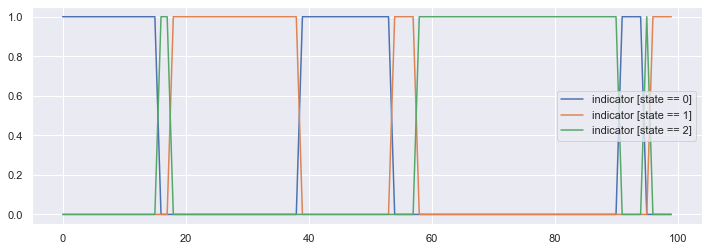

In [ ]:
t = np.zeros((3, 100))
for i in range(3):
    t[i, :] = (np.array(s) == i).astype(int)

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
for i in range(3):
    _ = axs.plot(t[i, :], label='indicator [state == {}]'.format(i))
_ = axs.legend()

In [ ]:
a, b = np.where(t)
assert np.all(np.array(a[np.argsort(b)]) == np.array(s))

Свойства такого формализма:

- в векторе $t_n$ может быть только один ненулевой элемент;
- предполагается, что система не может находиться в двух разных состояниях одновременно;
- распределение $t_n$ относительно $t_{n−1} -- p(t_n∣t_{n−1})$: матрица $A$, где $A_{ij}=p(t_{nj}=1∣t_{n−1,i}=1)$.

Стоит заметить, что $\sum \limits_{j=1}^K A_{ij}=1$. Следовательно, распределение можно записать следующим образом:

$p(t_n|t_{n-1}) = \prod\limits_{i=1}^K \prod\limits_{j=1}^K A_{ij}^{t_{n-1,i^{t_{nj}}}}$

- Начальное распределение $p(t1)$. Пусть $\pi_i=p(t_{1i}=1)$. Тогда

$p(t_1)=\prod\limits_{i=1}^K \pi_i^{t_{1i}}$.

- Обычно используются матрицы $A$ с преобладающими элементами на диагонали (более вероятно, что система не изменит своего состояния).
- Переменная $x_n$ зависит только от переменной состояния $t_n$: разумно рассматривать условное распределение $p(x_n∣t_n)$. Обычно предполагается, что оно известно с точностью до параметров $phi_k,k \in \{1,…,K\}$: то есть, если $t_{ni}=1$, то $p(x_n∣t_n)=p(x_n∣\phi_i)$.

$p(x_n∣t_n)=\prod\limits_{k=1}^K p(x_n∣\phi_k)^{t_{nk}}$.

Введённых параметров достаточно для полного описания скрытой марковской модели. Их собирают в набор параметров
$\Theta=(\pi,A,\phi)$, где $\pi=(\pi_1,…,\pi_K),\phi=(\phi1,…,\phi_K)$.


Основные задачи теории скрытых марковских процессов:
    
- **Обучение с учителем**. Пусть есть некоторая последовательность $X$, для которой известны латентные переменные $T$. По обучающей выборке нужно оценить набор параметров $\Theta$.
- **Сегментация**. Пусть известна последовательность наблюдаемых переменных $X$ и набор параметров $\Theta$. По ним нужно построить максимально правдоподобный набор латентных переменных $T$, то есть найти $argmax_T p(T∣X,\Theta)$.
- **Обучение без учителя**. Пусть известна последовательность наблюдаемых переменных $X$ и число состояний $K$. Нужно оценить набор параметров $\Theta$. Подзадача - **нахождение маргинального распределения**: найти $p(t_n∣X,\Theta)$.
- **Прогнозирование**. Пусть известна некоторая последовательность X длины N. Нужно оценить наблюдаемый вектор в момент времени $N+1$, то есть найти $p(x_{N+1}∣X)$.

# Как сгенерировать траекторию скрытой марковской модели?

In [ ]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

No handles with labels found to put in legend.


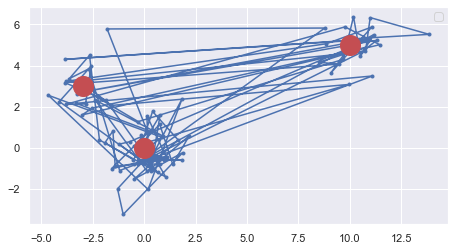

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

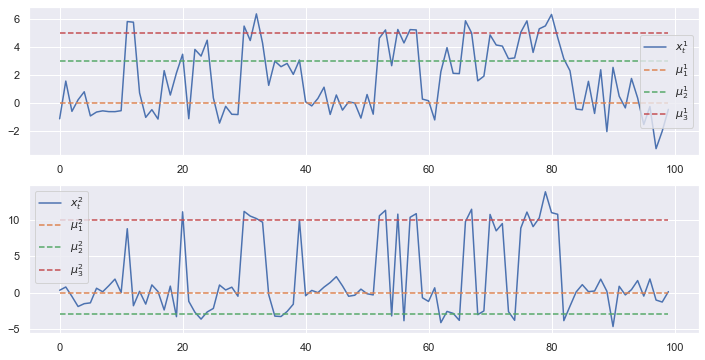

In [ ]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

# Прогноз с использованием HMM

In [ ]:
from hmmlearn.hmm import GaussianHMM

In [ ]:
series = pd.read_csv("../1. Лекция/Series/daily-total-female-births-in-cal.csv")["Count"]

In [ ]:
values = series.values.reshape(-1,1)

In [ ]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932182
2 -1231.4128457923243
3 -1228.6376241958285
4 -1222.4688246605524
5 -1214.072485075461
6 -1207.2119251061479
7 -1202.6312923489243
8 -1191.2110155143382
9 -1173.4767463555195
10 -1159.8226949636476
11 -1159.133734550312
12 -1155.5128023287934
13 -1140.6430064738374


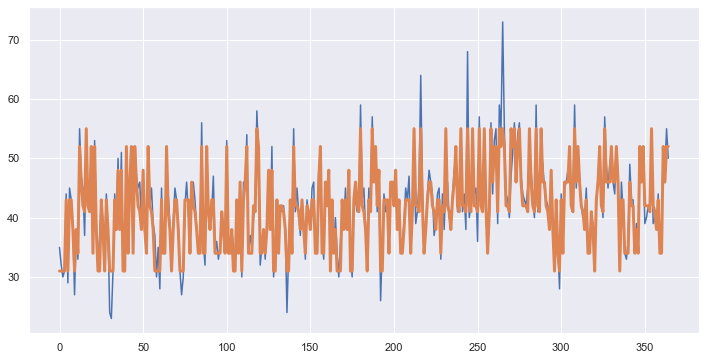

In [ ]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [ ]:
model.transmat_.shape

(10, 10)

Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.

## Практика. Спрогнозируйте ряд на 10 измерений вперед (через среднее каждой компоненты)

# Материалы

- http://quantile.ru/11/11-CK.pdf

# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.